# Fraud detection with Machine Learning model

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
card_info = pd.read_csv('data/cc_info.csv')
transaction_info = pd.read_csv('data/transactions.csv')

In [3]:
card_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [4]:
transaction_info.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


Check for missing values

In [5]:
card_info.isnull().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [6]:
transaction_info.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

Let's merge the two tables on the "credit_card" column.

In [7]:
credit_card = transaction_info.merge(card_info, on='credit_card')

credit_card.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


In [8]:
credit_card.shape

(294588, 9)

In [9]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294588 entries, 0 to 294587
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                294588 non-null  int64  
 1   date                       294588 non-null  object 
 2   transaction_dollar_amount  294588 non-null  float64
 3   Long                       294588 non-null  float64
 4   Lat                        294588 non-null  float64
 5   city                       294588 non-null  object 
 6   state                      294588 non-null  object 
 7   zipcode                    294588 non-null  int64  
 8   credit_card_limit          294588 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 20.2+ MB


### Exploring the data with visualization

Let's explore the dollar amount of transactions.

In [10]:
credit_card['transaction_dollar_amount'].describe()

count    294588.000000
mean         86.008036
std         124.655954
min           0.010000
25%          29.970000
50%          58.470000
75%         100.400000
max         999.970000
Name: transaction_dollar_amount, dtype: float64

Text(0.5, 0, 'Transaction Dollar Amount')

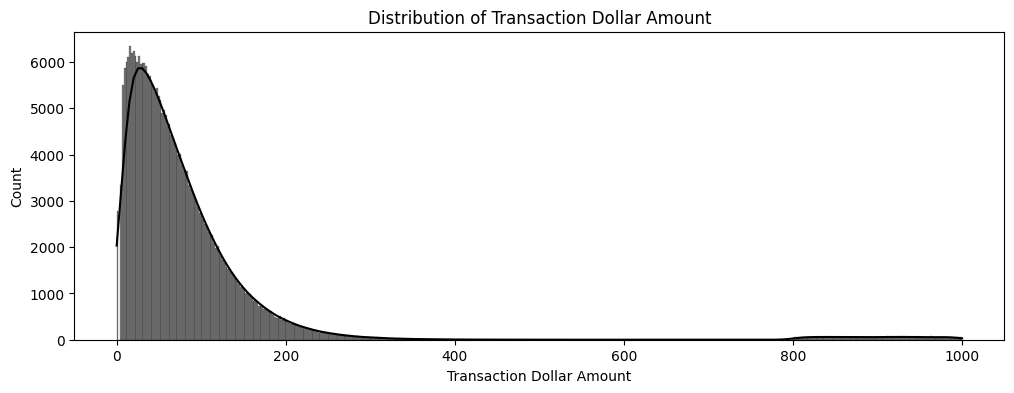

In [11]:
plt.figure(figsize=(12, 4))
sns.histplot(credit_card['transaction_dollar_amount'], kde=True, color='black')
plt.title('Distribution of Transaction Dollar Amount')
plt.xlabel('Transaction Dollar Amount')

Text(0.5, 1.0, 'Number of Transactions by Day')

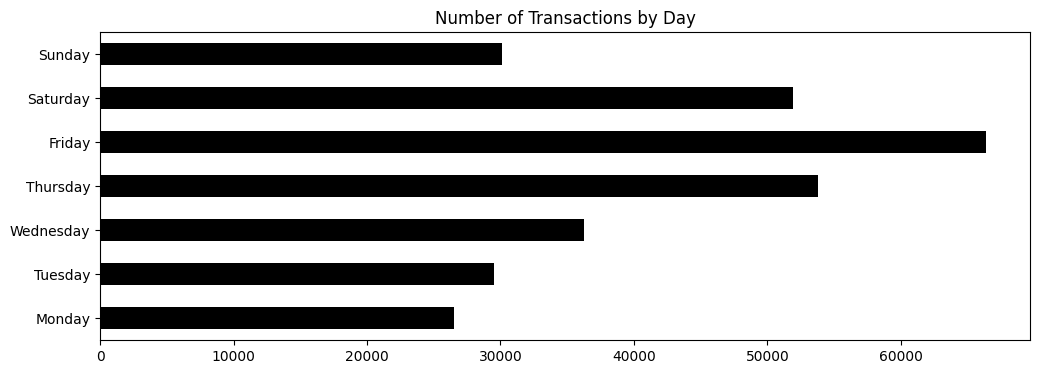

In [12]:
credit_card['date'] = pd.to_datetime(credit_card['date'])


credit_card['day_name'] = credit_card['date'].dt.day_name()
transaction_counts = credit_card.groupby('day_name')['transaction_dollar_amount'].count()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
transaction_counts = transaction_counts.reindex(days_order)

transaction_counts.plot(kind='barh', figsize=(12, 4), color='black', ylabel='')
plt.title('Number of Transactions by Day')

Text(0.5, 0, 'Transaction Dollar Amount')

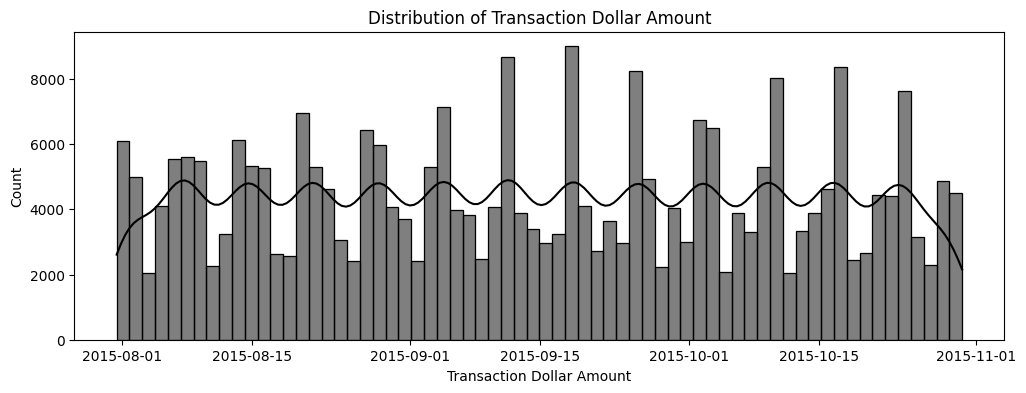

In [13]:
plt.figure(figsize=(12, 4))
sns.histplot(credit_card['date'], kde=True, color='black')
plt.title('Distribution of Transaction Dollar Amount')
plt.xlabel('Transaction Dollar Amount')

In [14]:
credit_card['credit_card_limit'].describe()

count    294588.000000
mean      15502.053716
std        7956.291556
min        2000.000000
25%       10000.000000
50%       15000.000000
75%       20000.000000
max       55000.000000
Name: credit_card_limit, dtype: float64

Text(0.5, 1.0, 'Credit Card limit distribution')

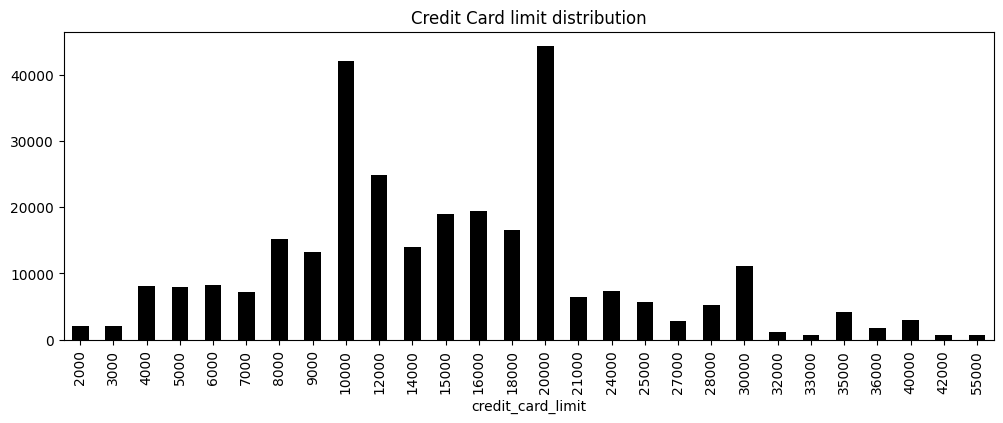

In [15]:
credit_card['credit_card_limit'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize=(12, 4), color='black')
plt.title('Credit Card limit distribution')

Text(0, 0.5, 'Transaction Dollar Amount')

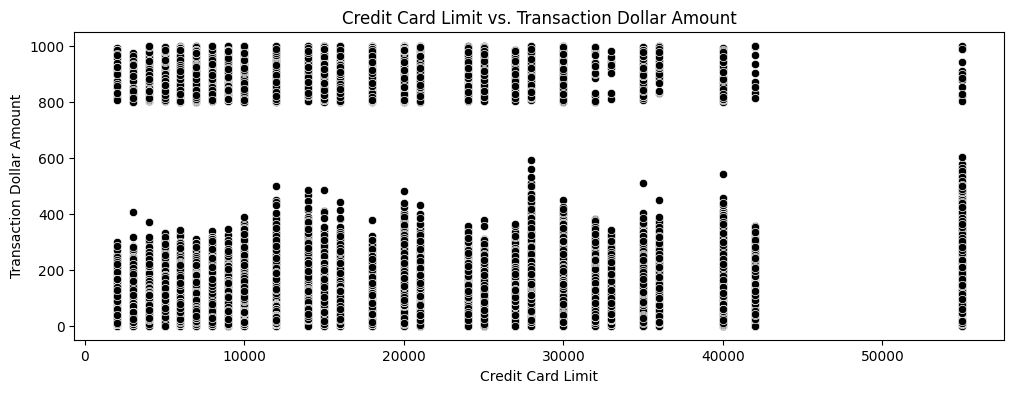

In [16]:
plt.figure(figsize=(12, 4))
sns.scatterplot(credit_card, x = 'credit_card_limit', y = 'transaction_dollar_amount', color='black')
plt.title('Credit Card Limit vs. Transaction Dollar Amount')
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Dollar Amount')


In [17]:
credit_card.select_dtypes(include=['datetime', 'float', 'int']).corr()

,credit_card,date,transaction_dollar_amount,Long,Lat,zipcode,credit_card_limit
credit_card,1.000000,0.000360,0.009553,-0.014723,-0.026233,0.023004,0.011901
date,0.000360,1.000000,0.001426,0.001714,0.000461,0.001589,-0.000578
transaction_dollar_amount,0.009553,0.001426,1.000000,0.005647,-0.003378,-0.005318,0.188185
Long,-0.014723,0.001714,0.005647,1.000000,-0.090308,-0.499151,0.001861
Lat,-0.026233,0.000461,-0.003378,-0.090308,1.000000,-0.309885,-0.020188
zipcode,0.023004,0.001589,-0.005318,-0.499151,-0.309885,1.000000,0.011202
credit_card_limit,0.011901,-0.000578,0.188185,0.001861,-0.020188,0.011202,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

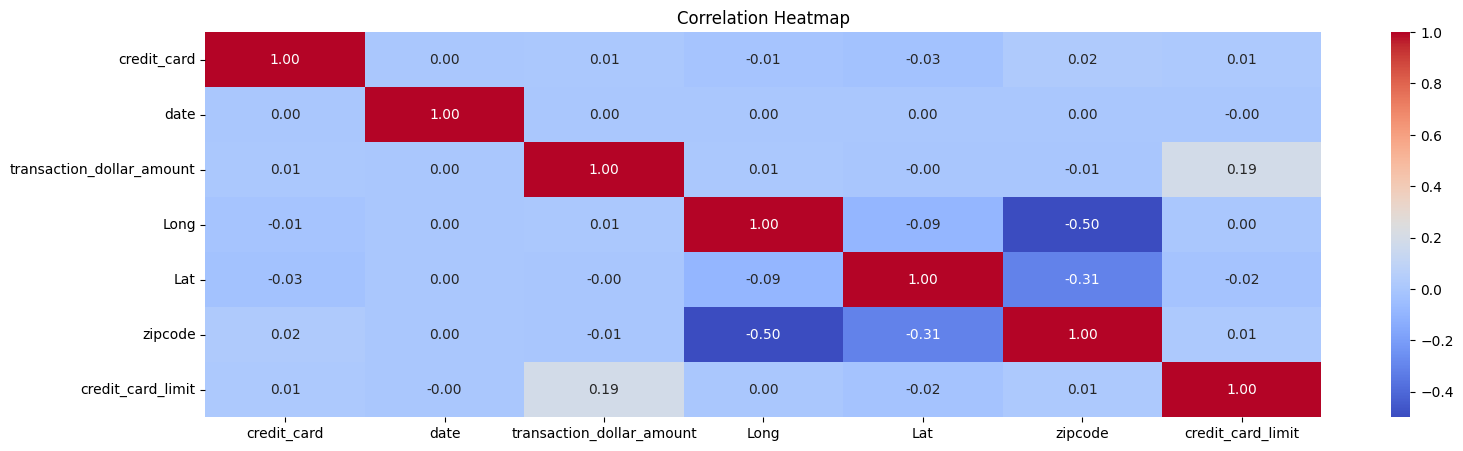

In [18]:
plt.figure(figsize=(18, 5))
sns.heatmap(credit_card.select_dtypes(include=['datetime', 'float', 'int']).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Number of Transactions by State')

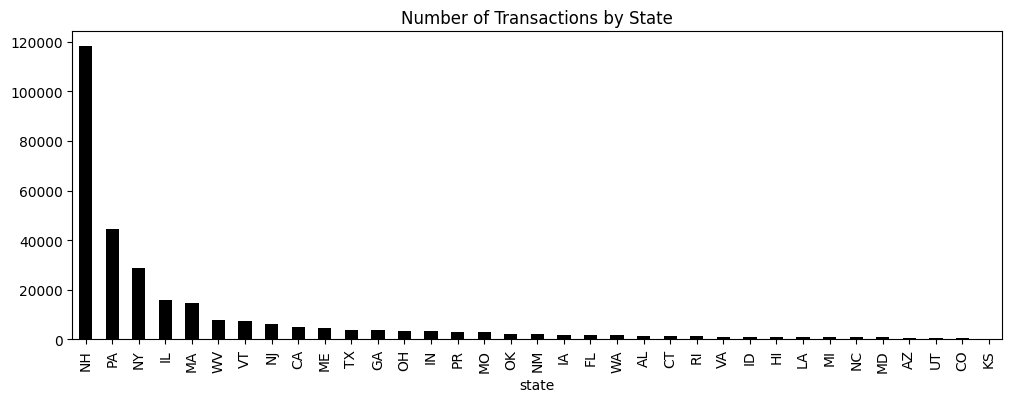

In [19]:
city_total_transactions = credit_card['state'].value_counts()

plt.figure(figsize=(12, 4))
city_total_transactions.plot(kind='bar', figsize=(12, 4), color='black')
plt.title('Number of Transactions by State')

In [20]:
credit_card['credit_card'].unique().shape

(984,)

## Model Building

Let's build a model to predict whether a transaction is fraudulent or not.

In [21]:
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix, accuracy_score

In [22]:
credit_card.columns

Index(['credit_card', 'date', 'transaction_dollar_amount', 'Long', 'Lat',
       'city', 'state', 'zipcode', 'credit_card_limit', 'day_name'],
      dtype='object')

We'll apply one-hot encoding because it transforms categorical variables into a format that can be used by machine learning models, by representing each category as a binary vector.

In [23]:
# One-Hot Encoding for categorical variables
numeric_cols = ['credit_card_limit', 'transaction_dollar_amount', 'Long', 'Lat']
categorical_cols = ['city', 'state', 'zipcode']

credit_card = credit_card.drop(['date', 'day_name'], axis=1)
df_encoded = pd.get_dummies(credit_card, columns=categorical_cols, drop_first=True)
df_encoded.shape
df_encoded = df_encoded.astype(int)

In [24]:
df_encoded.head()

,credit_card,transaction_dollar_amount,Long,Lat,credit_card_limit,city_Albany,city_Alexandria,city_Amarillo,city_Arlington,city_Atlanta,...,zipcode_83701,zipcode_84101,zipcode_85701,zipcode_87701,zipcode_90001,zipcode_94101,zipcode_94589,zipcode_96801,zipcode_98060,zipcode_98401
0,1003715054175576,43,-80,40,20000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1003715054175576,103,-80,40,20000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1003715054175576,48,-80,40,20000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1003715054175576,136,-80,40,20000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1003715054175576,71,-80,40,20000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Spliting the data into training and testing and then applying normalization.

In [25]:
# Split data into training and testing
X_train, X_test = train_test_split(df_encoded, test_size=0.2, random_state=42)

# Normalize numerical features 
scaler = StandardScaler()

X_train_scaled = X_train.copy() 
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.fit_transform(X_test[numeric_cols])


In [26]:
contaminations = [0.001, 0.005, 0.01, 0.02, 0.05]  # Testar múltiplos valores
results_isol = []

for cont in contaminations:
    model_isol = IsolationForest(contamination=cont)
    model_isol.fit(X_train_scaled)

    y_pred = model_isol.predict(X_test_scaled)

    silhou_score = silhouette_score(X_test_scaled, y_pred)
    results_isol.append((cont, silhou_score, sum(y_pred == -1)))

for contamination, sil_score, num_anomalies in results_isol:
    print(f'Contamination: {contamination} | Silhouette Score: {round(sil_score, 2)} | Num Anomalies: {num_anomalies}')


Contamination: 0.001 | Silhouette Score: -0.01 | Num Anomalies: 73
Contamination: 0.005 | Silhouette Score: -0.18 | Num Anomalies: 302
Contamination: 0.01 | Silhouette Score: 0.21 | Num Anomalies: 586
Contamination: 0.02 | Silhouette Score: 0.04 | Num Anomalies: 1153
Contamination: 0.05 | Silhouette Score: -0.03 | Num Anomalies: 2845


Usually fraudulent transactions are between 0.1% to 1% of total transactions according to financial reports. The Silhouette score present low values and even a small number of anomalies indicating that there are no clear separations between normal and fraudulent transactions. In this case, we assume a contamination value of 1%. 

In [27]:
#  Isolation Forest fit
contamination = 0.01
results_if = []

model_if = IsolationForest(contamination=contamination, random_state=42) 
model_if.fit(X_train_scaled)

# predicting anomalies
y_pred = model_if.predict(X_test_scaled)

# Silhouette Score
sil_score = silhouette_score(X_test_scaled, y_pred)
results_if.append((contamination, sil_score, sum(y_pred == -1)))


for contamination, sil_score, num_anomalies in results_if:
    print(f'Contamination: {contamination} | Silhouette Score: {sil_score} | Num Anomalies: {num_anomalies}')


Contamination: 0.01 | Silhouette Score: -0.09200469316020692 | Num Anomalies: 581


In [28]:
anomalies = X_test_scaled[y_pred == -1]  # Extrai as transações anômalas
anomalies.head()

,credit_card,transaction_dollar_amount,Long,Lat,credit_card_limit,city_Albany,city_Alexandria,city_Amarillo,city_Arlington,city_Atlanta,...,zipcode_83701,zipcode_84101,zipcode_85701,zipcode_87701,zipcode_90001,zipcode_94101,zipcode_94589,zipcode_96801,zipcode_98060,zipcode_98401
86841,3709941163857886,-0.342150,3.644183,1.368238,0.691981,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219483,7623592082548014,-0.269546,12.436474,-8.577109,0.566210,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261441,8867710239543529,-0.471224,-2.100779,-1.394358,-1.194582,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
149959,5446645498913605,-0.253412,-2.100779,-1.210185,-0.062644,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
173151,6075288092815423,-0.648701,-2.100779,-1.394358,-0.439957,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [29]:
anomalies[numeric_cols] = scaler.inverse_transform(anomalies[numeric_cols])

/tmp/ipykernel_403315/840781413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies[numeric_cols] = scaler.inverse_transform(anomalies[numeric_cols])


In [30]:
anomalies

,credit_card,transaction_dollar_amount,Long,Lat,credit_card_limit,city_Albany,city_Alexandria,city_Amarillo,city_Arlington,city_Atlanta,...,zipcode_83701,zipcode_84101,zipcode_85701,zipcode_87701,zipcode_90001,zipcode_94101,zipcode_94589,zipcode_96801,zipcode_98060,zipcode_98401
86841,3709941163857886,43.0,-3.0,48.0,21000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219483,7623592082548014,52.0,173.0,-6.0,20000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261441,8867710239543529,27.0,-118.0,33.0,6000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
149959,5446645498913605,54.0,-118.0,34.0,15000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
173151,6075288092815423,5.0,-118.0,33.0,12000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193468,6780209767452752,193.0,114.0,50.0,35000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204282,7103682245071504,61.0,-118.0,34.0,15000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
38784,2143299125896595,22.0,44.0,5.0,6000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228853,7804216189681274,85.0,-118.0,34.0,20000.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


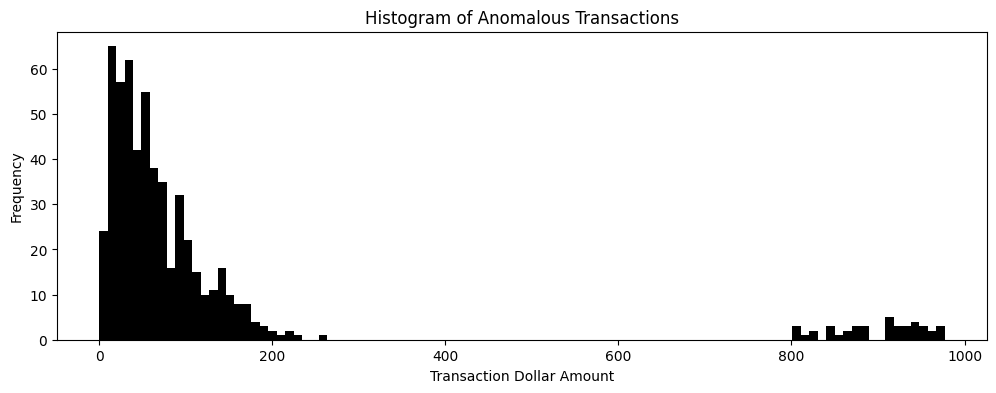

In [38]:
plt.figure(figsize=(12, 4))
plt.hist(anomalies['transaction_dollar_amount'], bins=100, color='black')
plt.title('Histogram of Anomalous Transactions')
plt.xlabel('Transaction Dollar Amount')
plt.ylabel('Frequency')
plt.show()

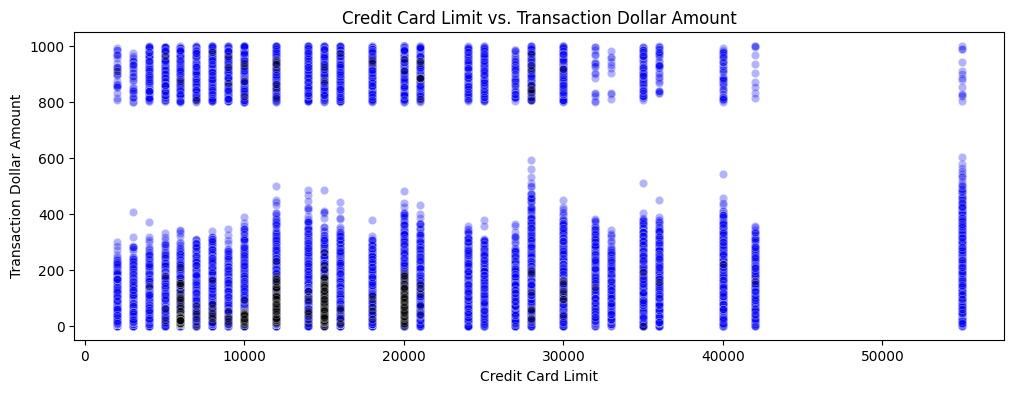

In [46]:
plt.figure(figsize=(12, 4))
sns.scatterplot(credit_card, x = 'credit_card_limit', y = 'transaction_dollar_amount', color='blue', alpha=0.3)
sns.scatterplot(anomalies, x = 'credit_card_limit', y = 'transaction_dollar_amount', color='black', alpha=0.3)

plt.title('Credit Card Limit vs. Transaction Dollar Amount')
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Dollar Amount')
plt.show()

In [33]:
anomalies['state'] = anomalies.filter(like='state_').idxmax(axis=1).str.replace('state_', '')
anomalies['city'] = anomalies.filter(like='city_').idxmax(axis=1).str.replace('city_', '')


/tmp/ipykernel_403315/755894781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['state'] = anomalies.filter(like='state_').idxmax(axis=1).str.replace('state_', '')
/tmp/ipykernel_403315/755894781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['city'] = anomalies.filter(like='city_').idxmax(axis=1).str.replace('city_', '')


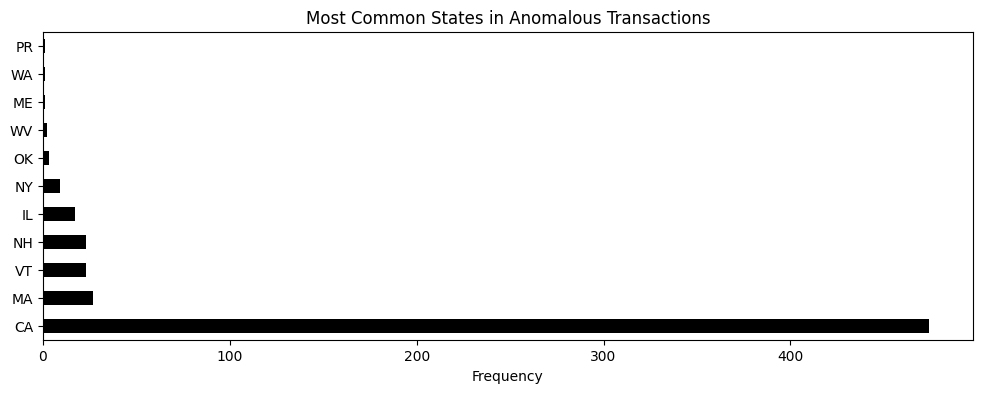

In [34]:
plt.figure(figsize=(12, 4))
anomalies['state'].value_counts().head(20).plot(kind='barh', color='black')
plt.title('Most Common States in Anomalous Transactions')
plt.ylabel('')
plt.xlabel('Frequency')
plt.show()


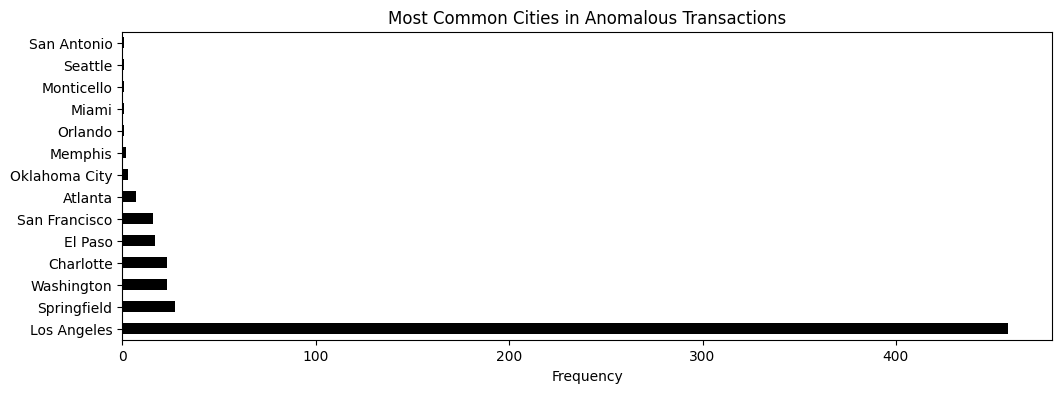

In [35]:
plt.figure(figsize=(12, 4))
anomalies['city'].value_counts().head(20).plot(kind='barh', color='black')
plt.title('Most Common Cities in Anomalous Transactions')
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

In [36]:
df = anomalies.groupby(['city', 'state', 'Long', 'Lat'])['transaction_dollar_amount'].sum().reset_index()

fig = go.Figure(data=go.Scattergeo(
        lon = df['Long'],
        lat = df['Lat'],
        text = [f'City: {city}<br>State: {state}<br>Amount: ${amount}' for city, state, amount in zip(df['city'], df['state'], df['transaction_dollar_amount'])], # hover text goes heredf['transaction_dollar_amount'],
        marker=dict(size = df['transaction_dollar_amount']/200)
        ))

fig.update_layout(
        title = 'Anomalous Transactions in USA',
        geo_scope='usa',
    )
fig.show()